In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('../data/xigua3.0.csv')
data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [3]:
data = data[['密度', '含糖率', '好瓜']]
data['好瓜'] = data['好瓜'].replace({"是": 1, "否": 0})
data

C:\Users\wangy\AppData\Local\Temp\ipykernel_16148\2816820055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['好瓜'] = data['好瓜'].replace({"是": 1, "否": 0})


,密度,含糖率,好瓜
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


In [4]:
from sklearn import naive_bayes

naive_bayes.__all__

['BernoulliNB', 'GaussianNB', 'MultinomialNB', 'ComplementNB', 'CategoricalNB']

In [5]:
model = naive_bayes.GaussianNB()
model.fit(data[['密度', '含糖率']], data['好瓜'])
model.score(data[['密度', '含糖率']], data['好瓜'])

0.7058823529411765

In [7]:
for model in [naive_bayes.GaussianNB(),
              naive_bayes.BernoulliNB(),
              naive_bayes.MultinomialNB(),
              naive_bayes.ComplementNB(),
              naive_bayes.CategoricalNB()]:
    print("model={}".format(model))
    model.fit(data[['密度', '含糖率']], data['好瓜'])
    print("score={}".format(model.score(data[['密度', '含糖率']], data['好瓜'])))

model=GaussianNB()
score=0.7058823529411765
model=BernoulliNB()
score=0.5294117647058824
model=MultinomialNB()
score=0.5294117647058824
model=ComplementNB()
score=0.5882352941176471
model=CategoricalNB()
score=0.5294117647058824


In [8]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


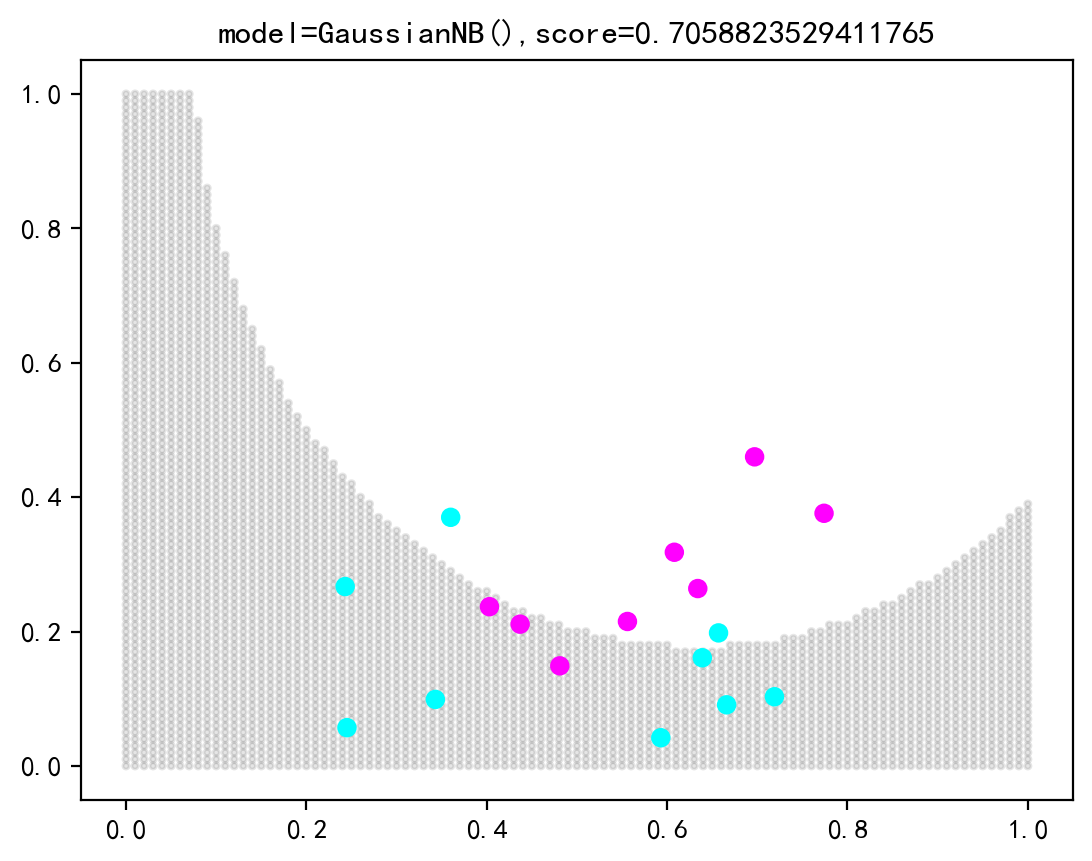

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


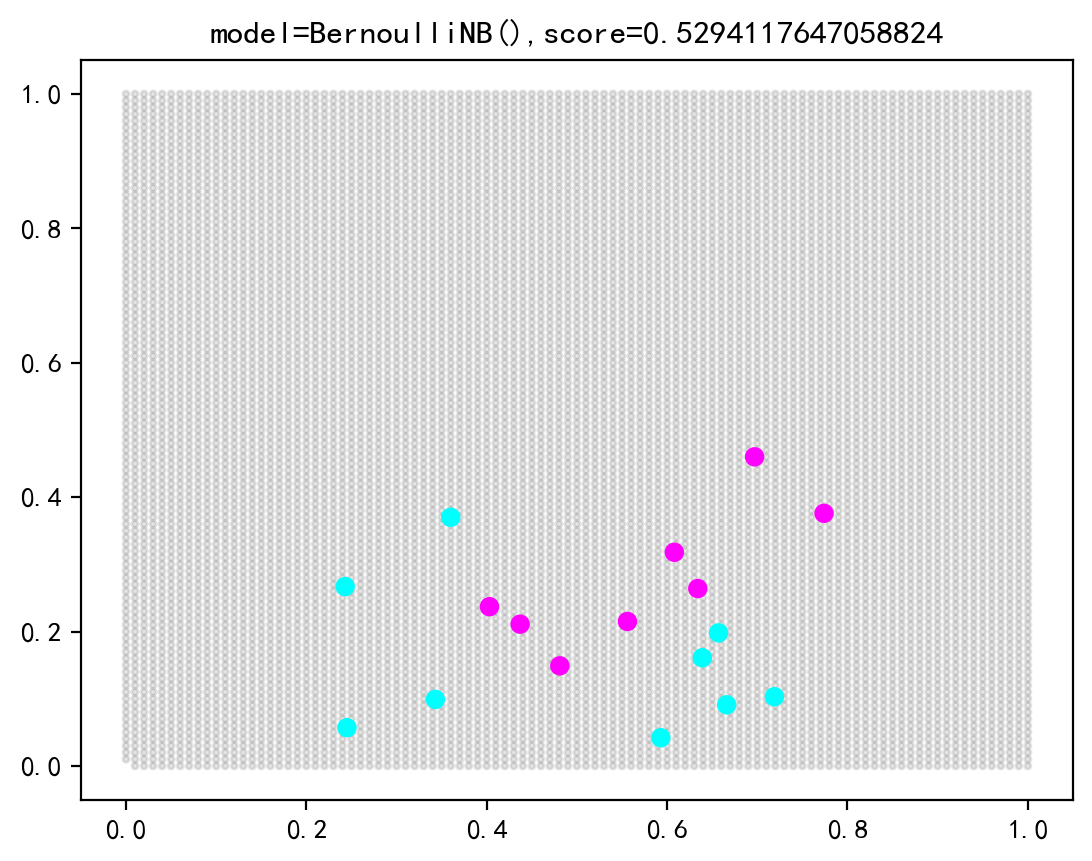

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


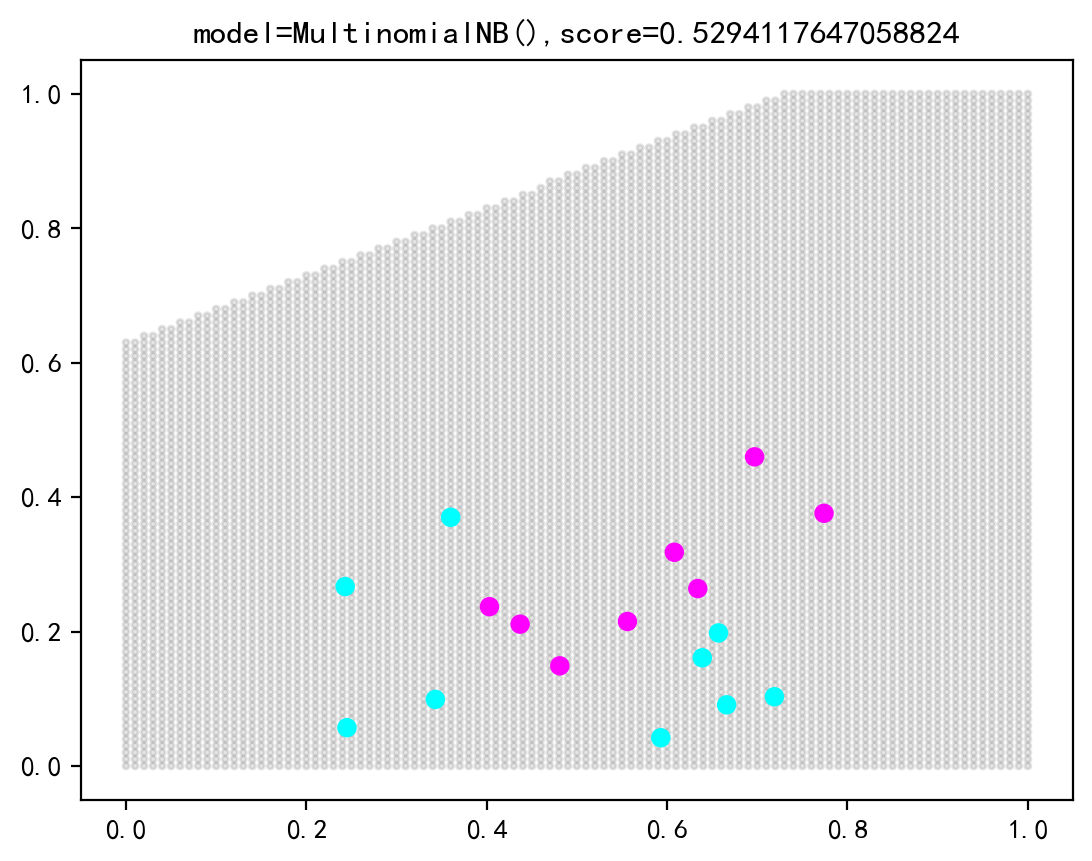

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


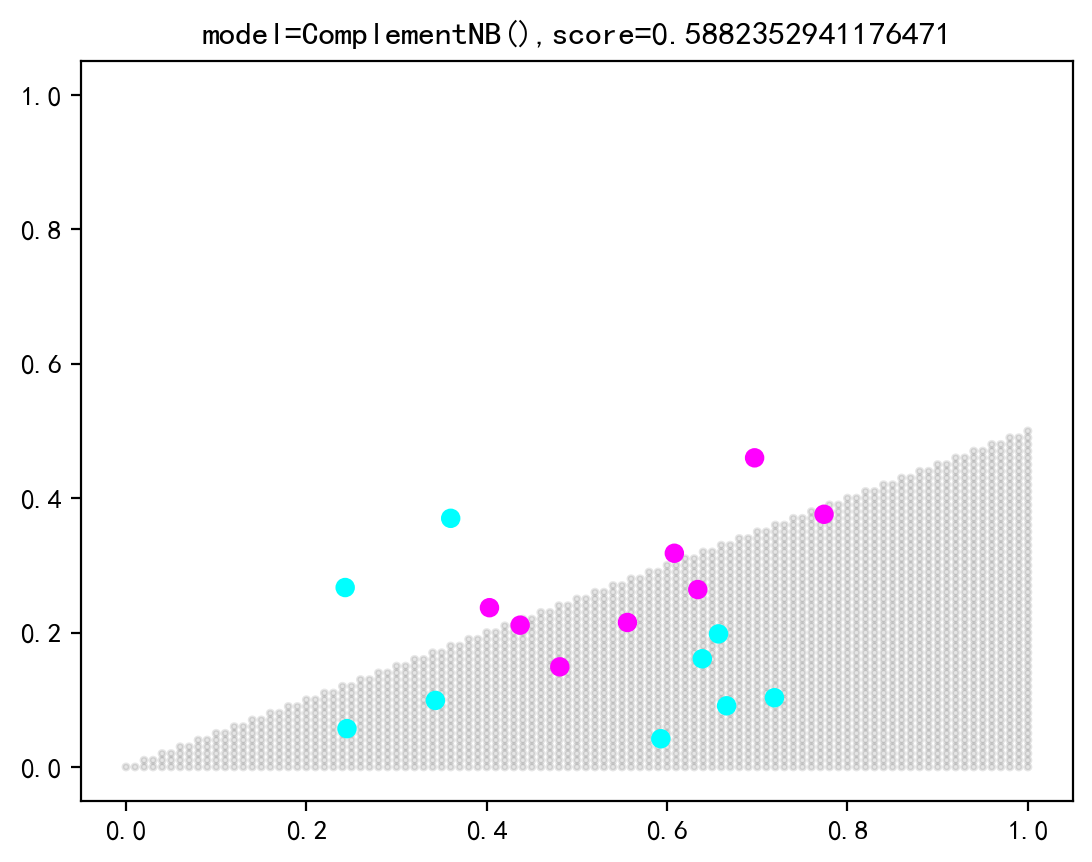

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [10]:
for model in [naive_bayes.GaussianNB(),
              naive_bayes.BernoulliNB(),
              naive_bayes.MultinomialNB(),
              naive_bayes.ComplementNB(),
              naive_bayes.CategoricalNB()]:
model.fit(data[['密度', '含糖率']], data['好瓜'])
disp_predict = model.predict(disp_input)
plt.figure(dpi=200)
plt.title("model={},score={}".format(model,
                                     model.score(data[['密度', '含糖率']], data['好瓜'])))
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'], data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


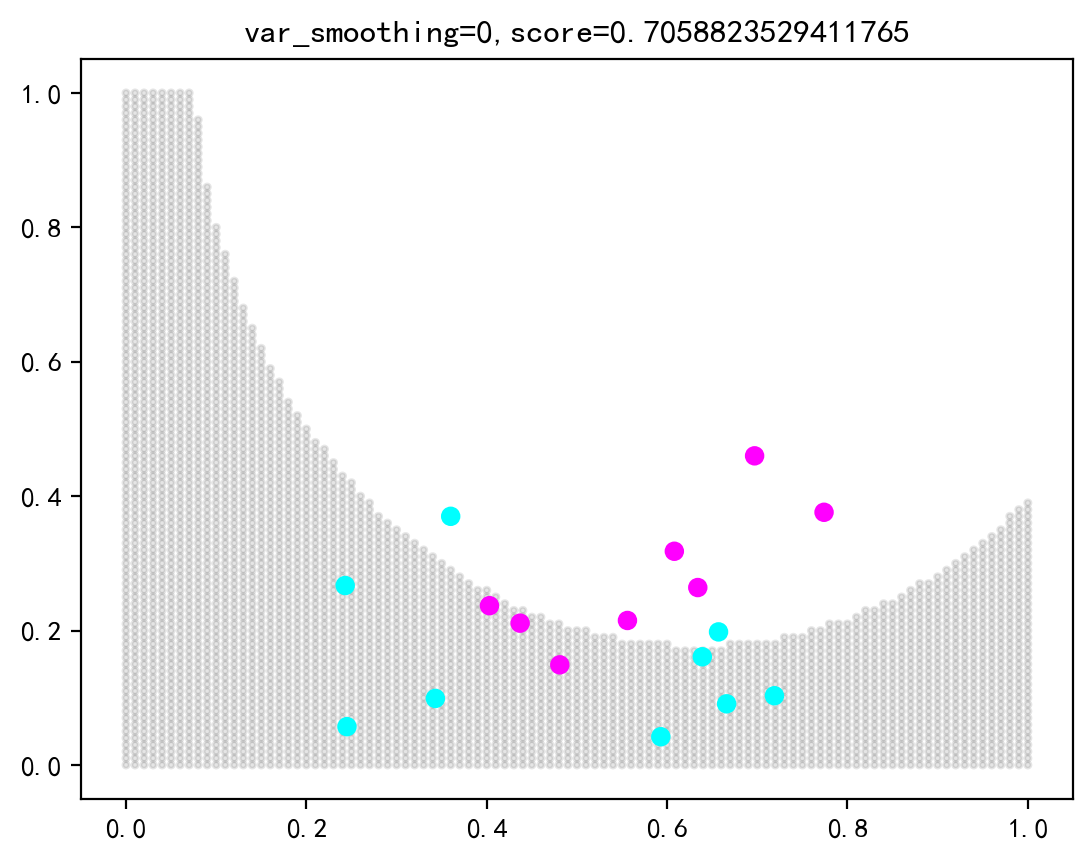

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


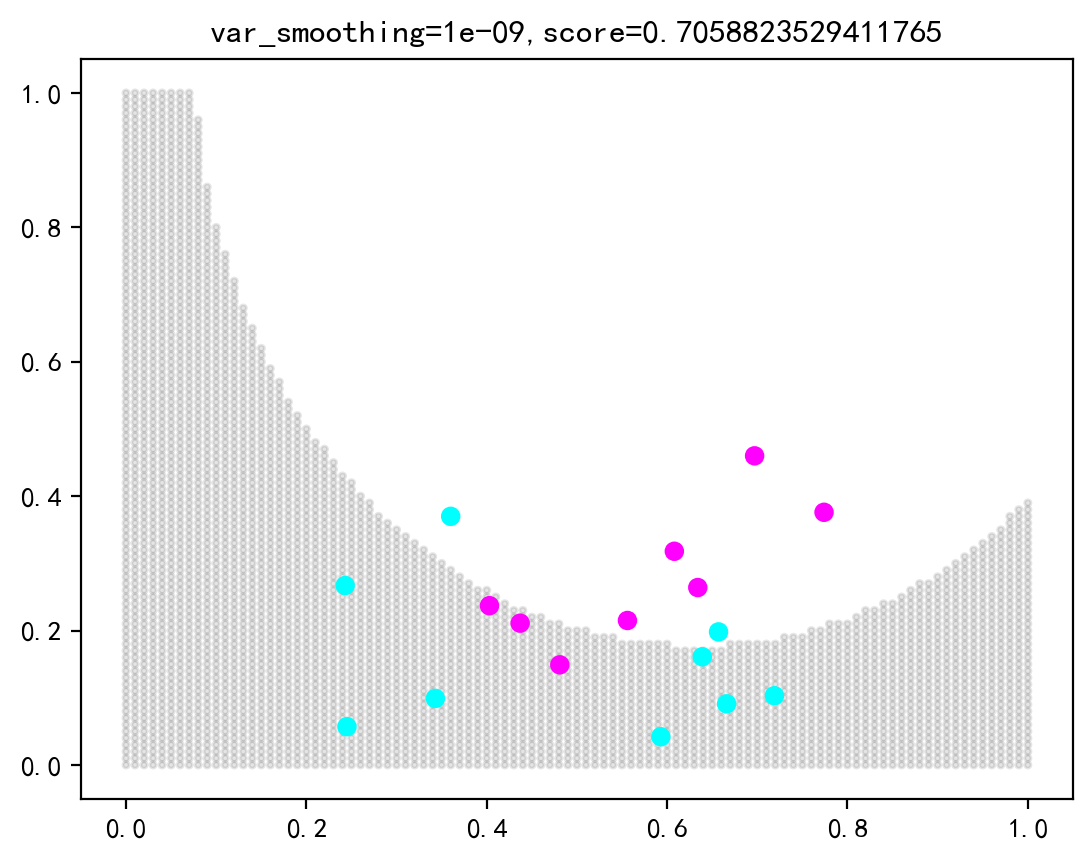

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


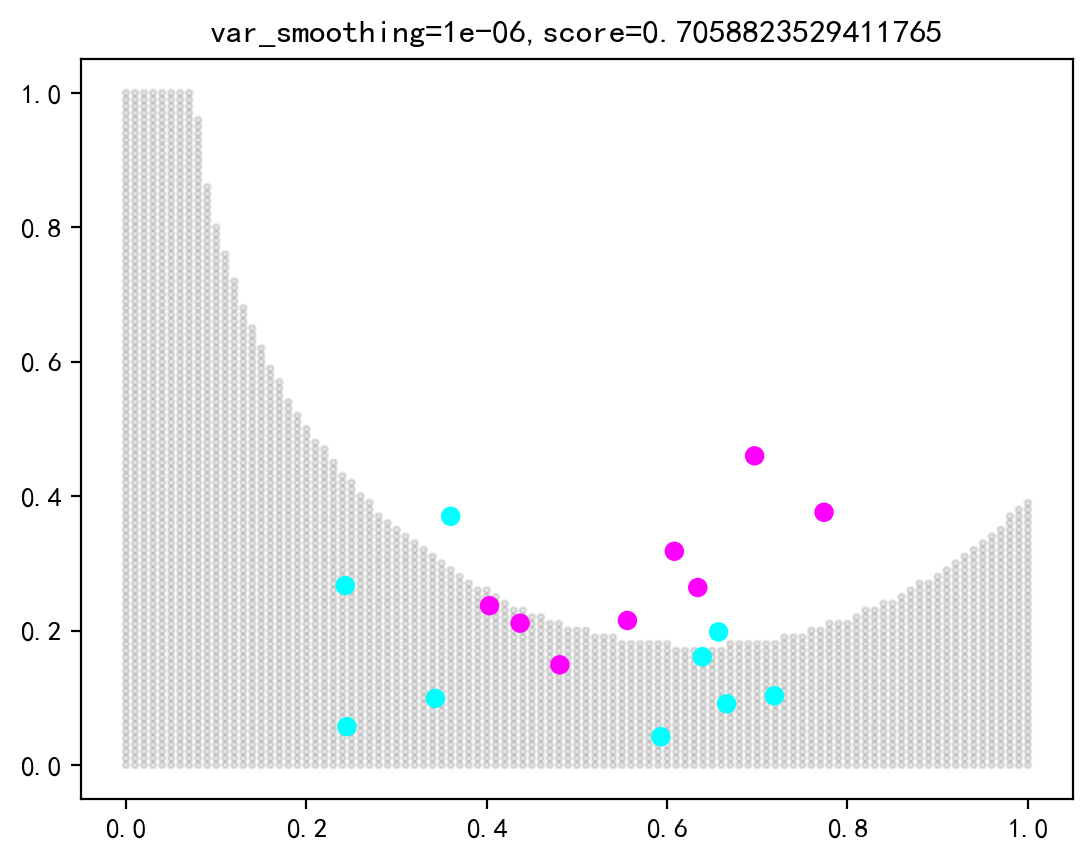

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


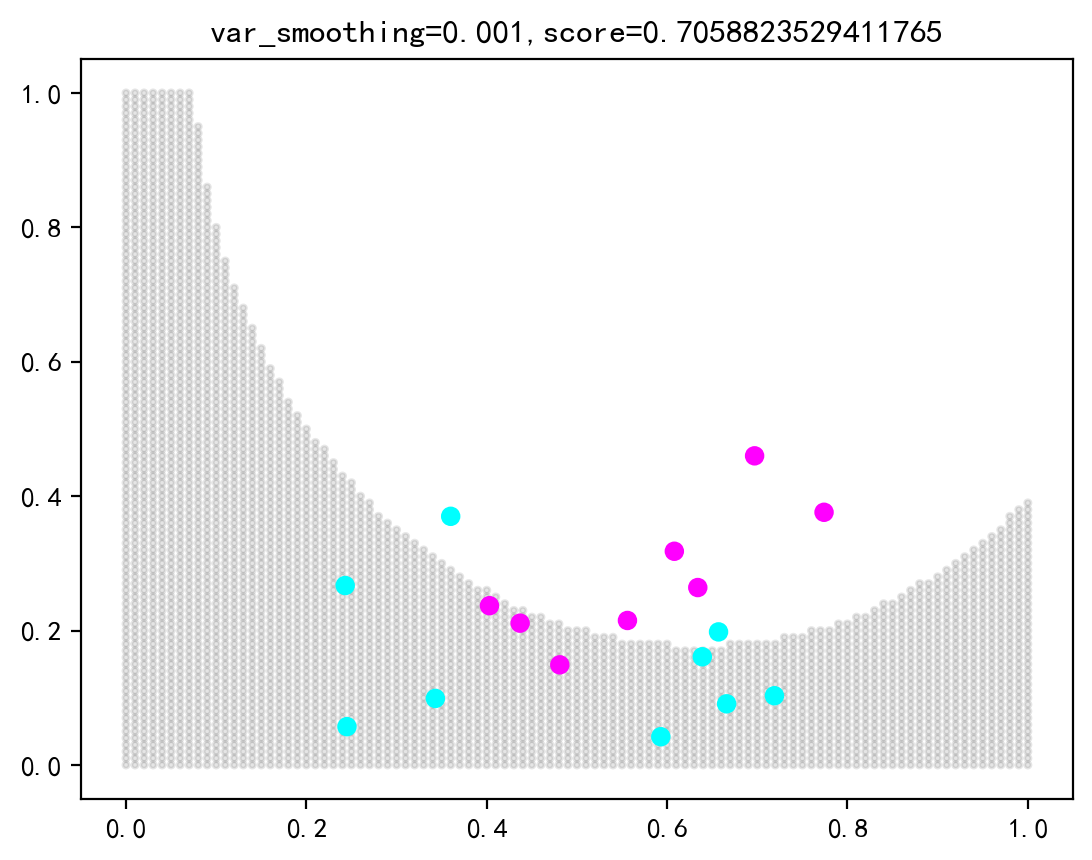

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


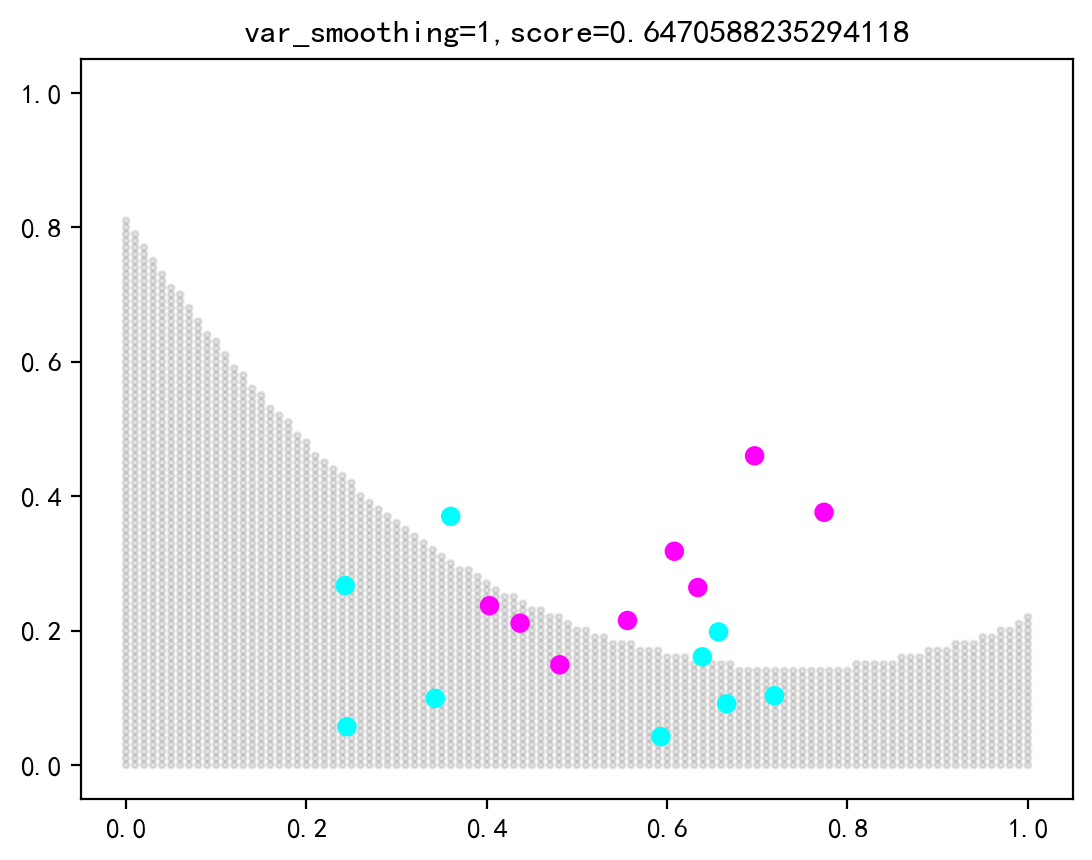

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


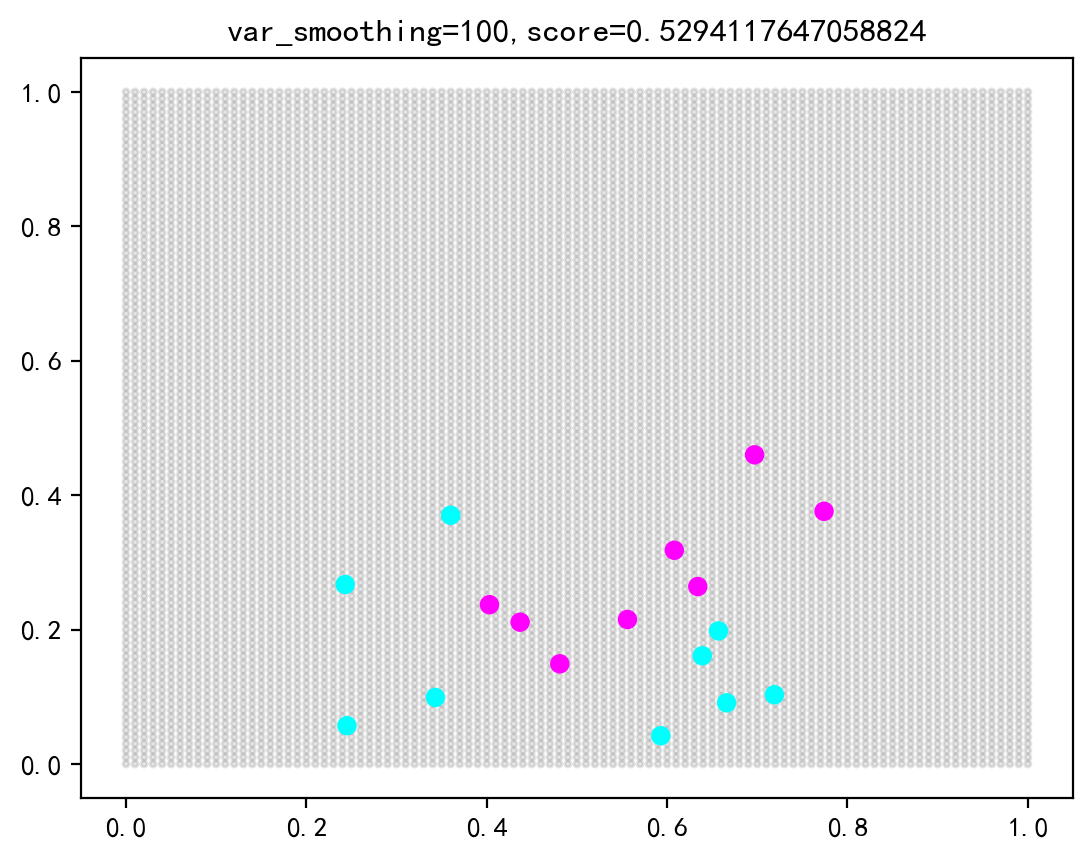

In [13]:
for var_smoothing in [0, 1e-9, 1e-6, 1e-3, 1, 100]:
    model = naive_bayes.GaussianNB(var_smoothing=var_smoothing)
    model.fit(data[['密度', '含糖率']], data['好瓜'])
    disp_predict = model.predict(disp_input)
    plt.figure(dpi=200)
    plt.title("var_smoothing={},score={}".format(var_smoothing,
                                         model.score(data[['密度', '含糖率']], data['好瓜'])))
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
    plt.scatter(data['密度'], data['含糖率'], c=data['好瓜'], cmap='cool')
    plt.show()